In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Walmart_Cleaned.csv")

In [4]:
df

,Store,Date,WeeklySales,HolidayFlag,Temperature,FuelPrice,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.head()

,Store,Date,WeeklySales,HolidayFlag,Temperature,FuelPrice,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.tail()

,Store,Date,WeeklySales,HolidayFlag,Temperature,FuelPrice,CPI,Unemployment
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,2012-10-26,760281.43,0,58.85,3.882,192.308899,8.667


In [7]:
df.columns

Index(['Store', 'Date', 'WeeklySales', 'HolidayFlag', 'Temperature',
       'FuelPrice', 'CPI', 'Unemployment'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   WeeklySales   6435 non-null   float64
 3   HolidayFlag   6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   FuelPrice     6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.describe()

,Store,WeeklySales,HolidayFlag,Temperature,FuelPrice,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# Overall Sales Trend Analysis (Line Chart)

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

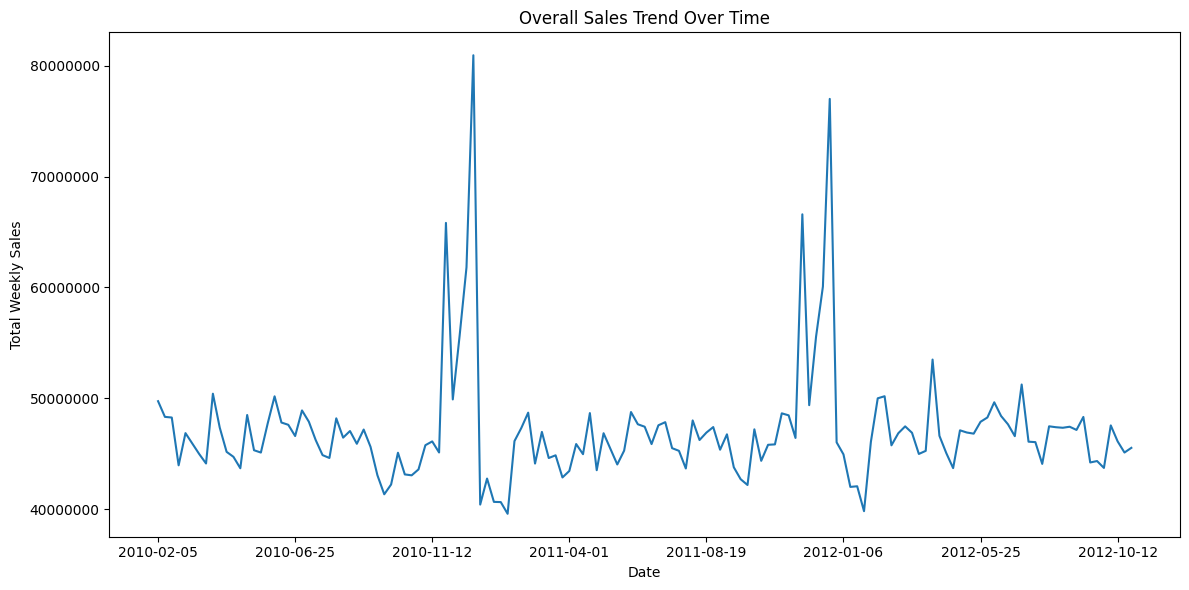

In [35]:
sales_trend = df.groupby('Date')['WeeklySales'].sum()

plt.figure(figsize=(12,6))
plt.plot(sales_trend)
plt.title("Overall Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.xticks(sales_trend.index[::20])
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Store Performance (Bar Chart)

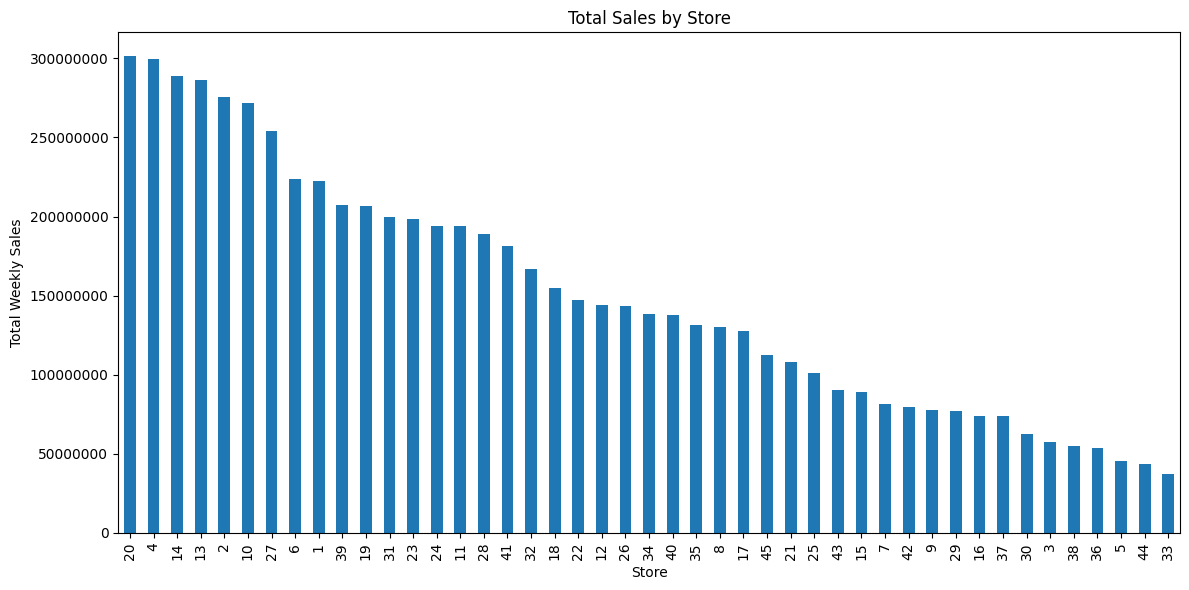

In [36]:
store_sales = df.groupby('Store')['WeeklySales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
store_sales.plot(kind='bar')
plt.title("Total Sales by Store")
plt.xlabel("Store")
plt.ylabel("Total Weekly Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Best & Worst Store

In [19]:
highest_store = store_sales.idxmax()
lowest_store = store_sales.idxmin()

print("Store with Highest Sales:", highest_store)
print("Store with Lowest Sales:", lowest_store)

Store with Highest Sales: 20
Store with Lowest Sales: 33


# Holiday vs Non-Holiday Sales (Pie Chart)

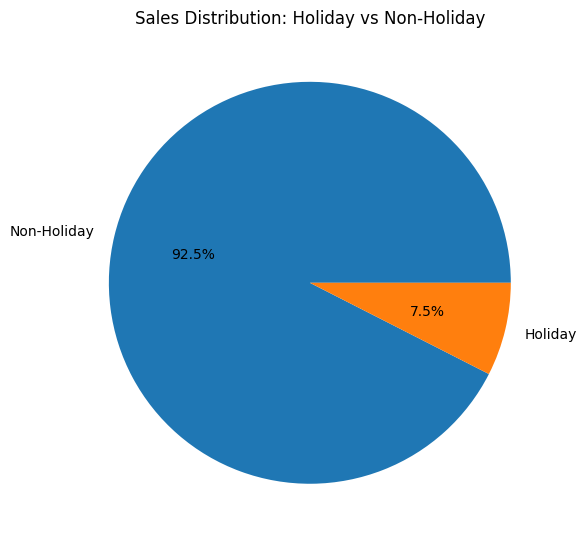

In [50]:
holiday_sales = df.groupby('HolidayFlag')['WeeklySales'].sum()

plt.figure(figsize=(6,6))
plt.pie(holiday_sales, labels=['Non-Holiday', 'Holiday'], autopct='%1.1f%%')
plt.title("Sales Distribution: Holiday vs Non-Holiday")
plt.tight_layout()
plt.show()

# Correlation Heatmap

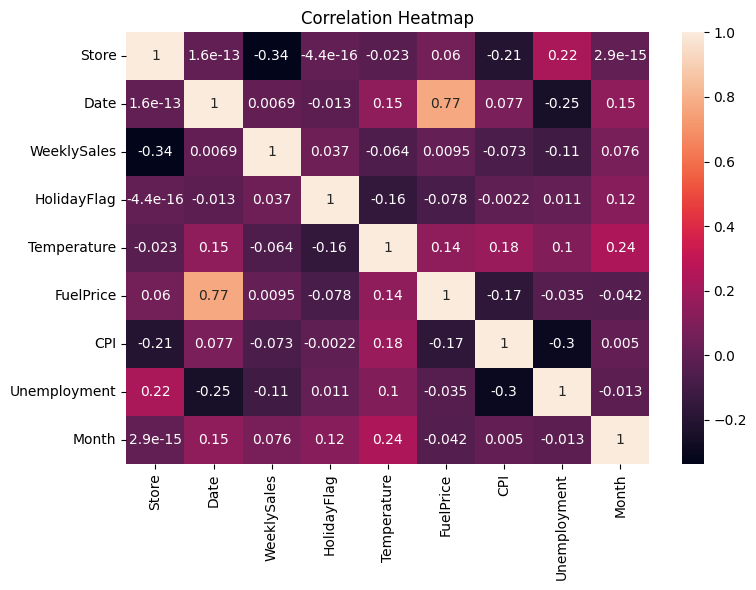

In [49]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Trend Analysis

# Monthly Sales Trend (Line Chart)

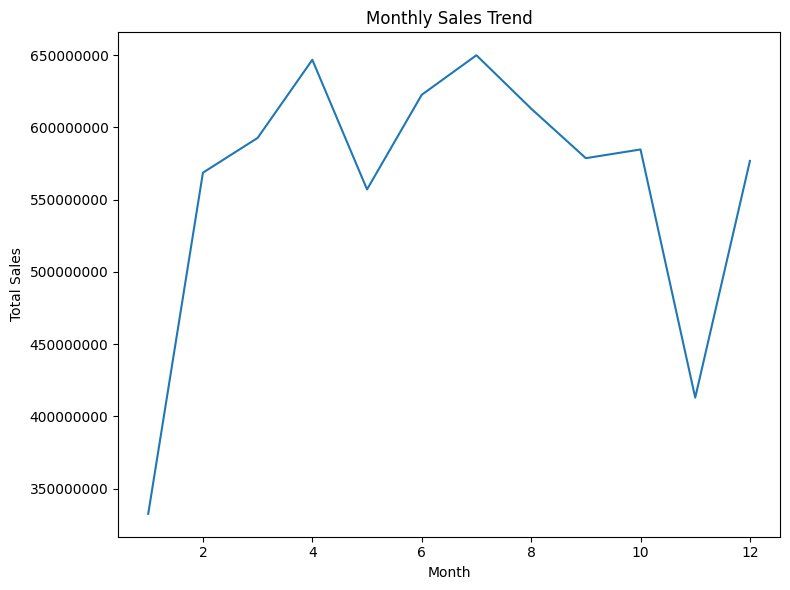

In [39]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['WeeklySales'].sum()

plt.figure(figsize=(8,6))
monthly_sales.plot(kind='line')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Temperature vs Sales (Scatter Plot)

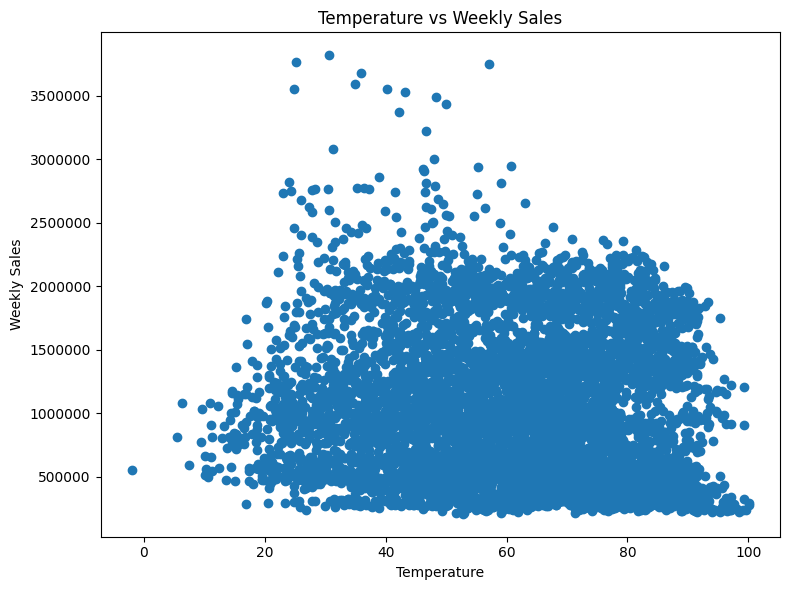

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(df['Temperature'], df['WeeklySales'])
plt.title("Temperature vs Weekly Sales")
plt.xlabel("Temperature")
plt.ylabel("Weekly Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Unemployment vs Sales (Scatter Plot)

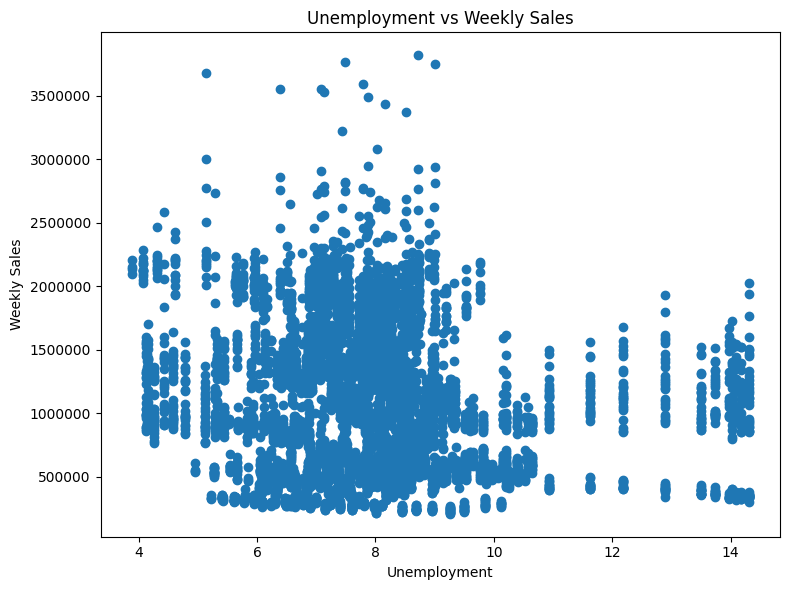

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(df['Unemployment'], df['WeeklySales'])
plt.title("Unemployment vs Weekly Sales")
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Fuel Price vs Weekly Sales (Scatter Plot)

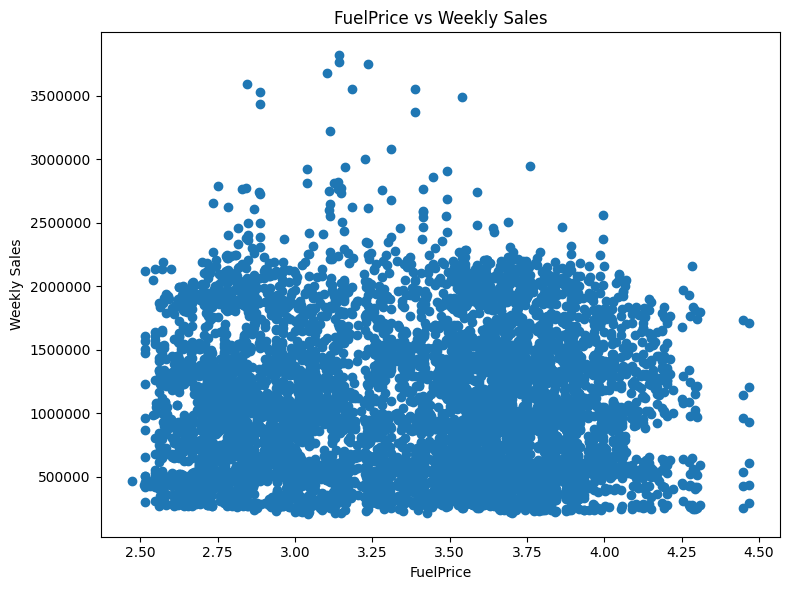

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(df['FuelPrice'], df['WeeklySales'])
plt.title("FuelPrice vs Weekly Sales")
plt.xlabel("FuelPrice")
plt.ylabel("Weekly Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# CPI vs Weekly Sales (Scatter Plot)

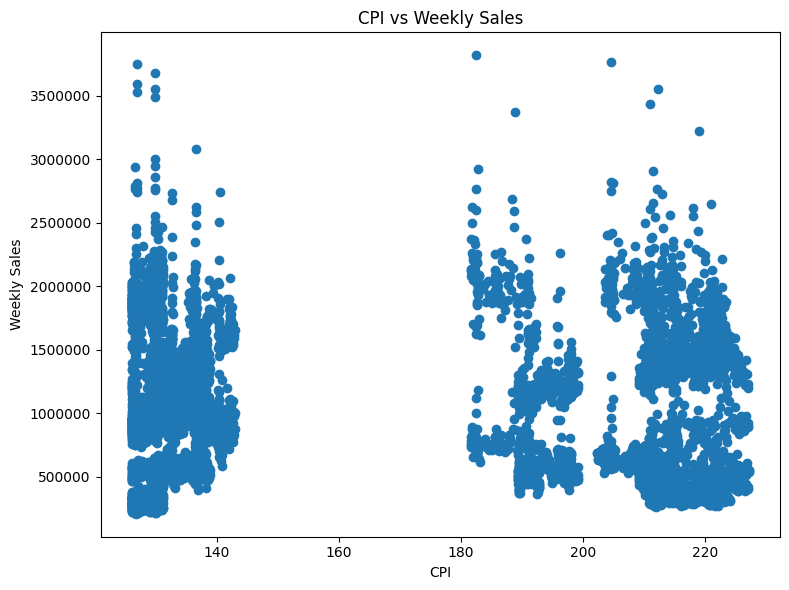

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(df['CPI'], df['WeeklySales'])
plt.title("CPI vs Weekly Sales")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# Average Weekly Sales: Holiday vs Non-Holiday (Bar Chart)

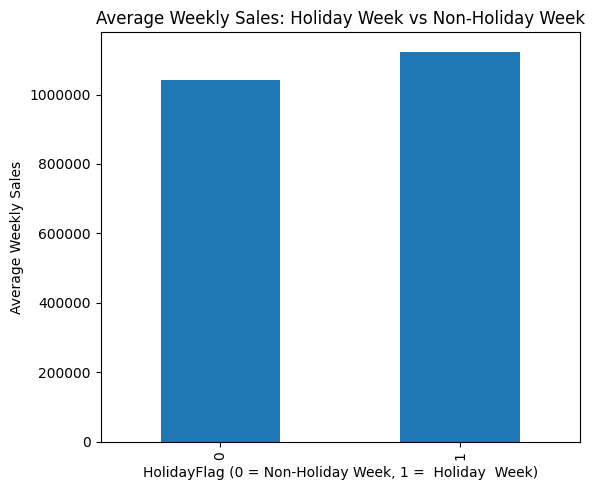

In [58]:
holiday_sales = df.groupby('HolidayFlag')['WeeklySales'].mean()

plt.figure(figsize=(6,5))
holiday_sales.plot(kind='bar')

plt.title("Average Weekly Sales: Holiday Week vs Non-Holiday Week")
plt.xlabel("HolidayFlag (0 = Non-Holiday Week, 1 =  Holiday  Week)")
plt.ylabel("Average Weekly Sales")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()